In [1]:
#First, we import the LIM package and its key component, driver
from pyLIM import driver

#We then import numpy for mathematical calculations
#datetime for date and time functionality
#and matplotlib for plotting
import numpy as np
from datetime import datetime as dt,timedelta
import matplotlib.pyplot as plt
import copy

#We'll be ignoring warnings from functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Initialize LIM driver
LIMdriver = driver.Driver()

In [3]:
#Compile data and calculate anomalies for each variable.
LIMdriver.get_variables(info='../namelist.py',read_path='/Users/slillo/binariesforlim')

reading H100
reading H500
reading SLP
reading T2m
reading colIrr
reading SF750
reading SOIL


In [4]:
#Can add another variable to the current LIM driver individually too.
LIMdriver.get_variables(info={'SF750':
                ('/Volumes/time machine backup/ALL_LIM_STUFF/Data_res2/stream/','stream',
                                        {'level':750,
                                        'latbounds':(20,90),
                                        'lonbounds':(0,360),
                                        'datebounds':('1/1','12/31'),
                                        'climoyears':(1979,2017),
                                        'time_window':7,
                                        'coarsegrain':5})},\
                        save_path='/Volumes/time machine backup/newbinaries')

--> Starting to gather data for SF750
Gathering data: [####################] 100.0% DONE
--> Completed gathering data (347.7 seconds)


In [4]:
#View summaries of all the compiled variables
LIMdriver.variables

{'H100': <variable dataset for LIM>
 Dataset Summary:
     label:             H100
     data path:         /Volumes/time machine backup/ALL_LIM_STUFF/Data_res2/geopot/
     years:             1979 — 2017
     date bounds:       1/1 — 12/31
     lat bounds:        (30, 90)
     lon bounds:        (0, 360)
     anomaly range:     (-799.2238631047803, 749.4241549959625)
     anomaly stdev:     122.16992676316879
     averaging window:  7
     time sample:       1 day
     long_name:         Geopotential
     units:             m^2/s^2
     level:             100,
 'H500': <variable dataset for LIM>
 Dataset Summary:
     label:             H500
     data path:         /Volumes/time machine backup/ALL_LIM_STUFF/Data_res2/geopot/
     years:             1979 — 2017
     date bounds:       1/1 — 12/31
     lat bounds:        (20, 90)
     lon bounds:        (0, 360)
     anomaly range:     (-481.3492911635258, 591.9884875556327)
     anomaly stdev:     84.09624850217915
     averaging window

In [4]:
#Calculate EOFs for a list of specified variables or variable combinations, given as a tuple e.g. ('H100','H10')
#Names in list must correspond with names of variables.
eof_list = ['H500','T2m','H100','SF750','SLP','colIrr']
datebounds = ('6/1','7/28')
LIMdriver.get_eofs(eof_list,datebounds=datebounds)#,save_path='/Volumes/time machine backup/newbinaries')

H500
--> Starting to calculate EOFs (takes a minute for large datasets)
--> Completed calculating EOFs (3.6 seconds)
T2m
--> Starting to calculate EOFs (takes a minute for large datasets)
--> Completed calculating EOFs (0.2 seconds)
H100
--> Starting to calculate EOFs (takes a minute for large datasets)
--> Completed calculating EOFs (1.9 seconds)
SF750
--> Starting to calculate EOFs (takes a minute for large datasets)
--> Completed calculating EOFs (3.0 seconds)
SLP
--> Starting to calculate EOFs (takes a minute for large datasets)
--> Completed calculating EOFs (3.0 seconds)
colIrr
--> Starting to calculate EOFs (takes a minute for large datasets)
--> Completed calculating EOFs (7.3 seconds)


In [6]:
#View summaries of all the compiled EOFs
LIMdriver.eofobjs

{('H100',
  'H500'): <EOF dataset for LIM>
 EOF Summary:
     variables:         H100, H500
     years:             1979 — 2017
     date bounds:       6/1 — 7/28
     first 5 var expl:  0.126, 0.075, 0.063, 0.057, 0.047,
 'T2m': <EOF dataset for LIM>
 EOF Summary:
     variables:         T2m
     years:             1979 — 2017
     date bounds:       6/1 — 7/28
     first 5 var expl:  0.153, 0.125, 0.106, 0.074, 0.064,
 'SLP': <EOF dataset for LIM>
 EOF Summary:
     variables:         SLP
     years:             1979 — 2017
     date bounds:       6/1 — 7/28
     first 5 var expl:  0.142, 0.081, 0.061, 0.054, 0.052,
 'colIrr': <EOF dataset for LIM>
 EOF Summary:
     variables:         colIrr
     years:             1979 — 2017
     date bounds:       6/1 — 7/28
     first 5 var expl:  0.063, 0.053, 0.045, 0.040, 0.024,
 'SF750': <EOF dataset for LIM>
 EOF Summary:
     variables:         SF750
     years:             1979 — 2017
     date bounds:       6/1 — 7/28
     first 5 var ex

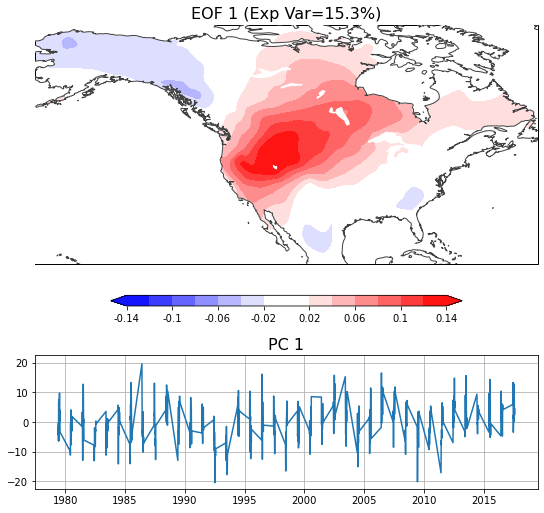

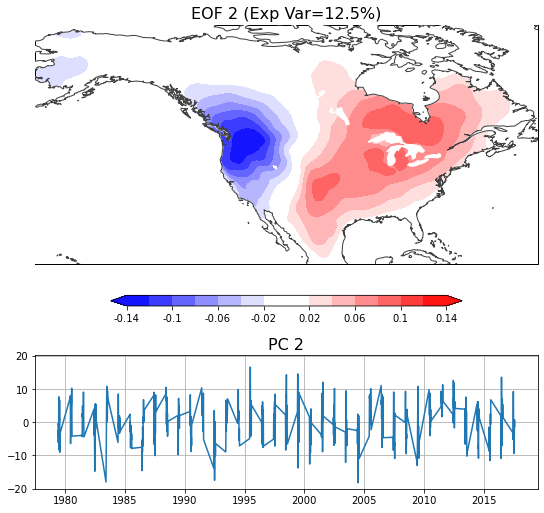

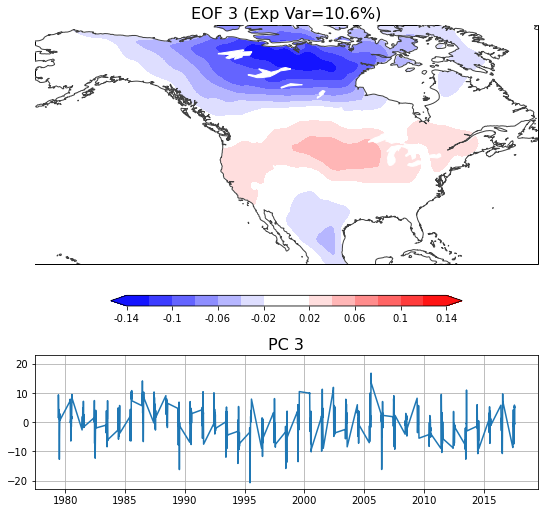

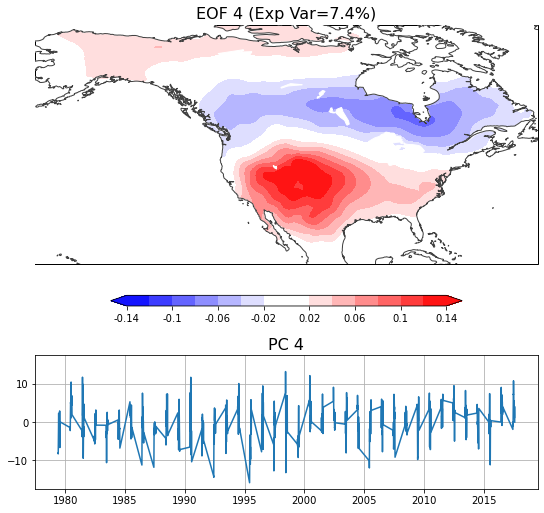

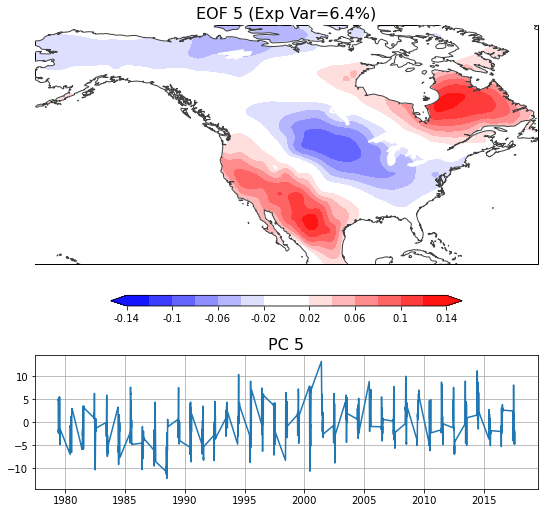

In [5]:
#Plot EOFs
LIMdriver.eofobjs['T2m'].plot(prop={'interpolate':.5})

In [14]:
#Train LIM and retrieve object with attributes of the model and forecast method
#eof_trunc is a dictionary with keys corresponding with the EOF name and values corresponding to truncations.
#Can loop through different combinations of EOFs and EOF truncations to compare multiple models.
eof_trunc = {'H100':12,'T2m':5,'H500':15,'SLP':23,'colIrr':23,'SF750':16}
LIMdriver.get_model(eof_trunc=eof_trunc, tau1n=5, datebounds=None, yearbounds=None,\
                  load_file=None, save_file='/Users/slillo/lim.p', save_to_netcdf=None)

Initializing LIM forecasting object...
LIM trained and contained in self.model


Text(0.5, 1.0, 'H500 variance from full anomalies')

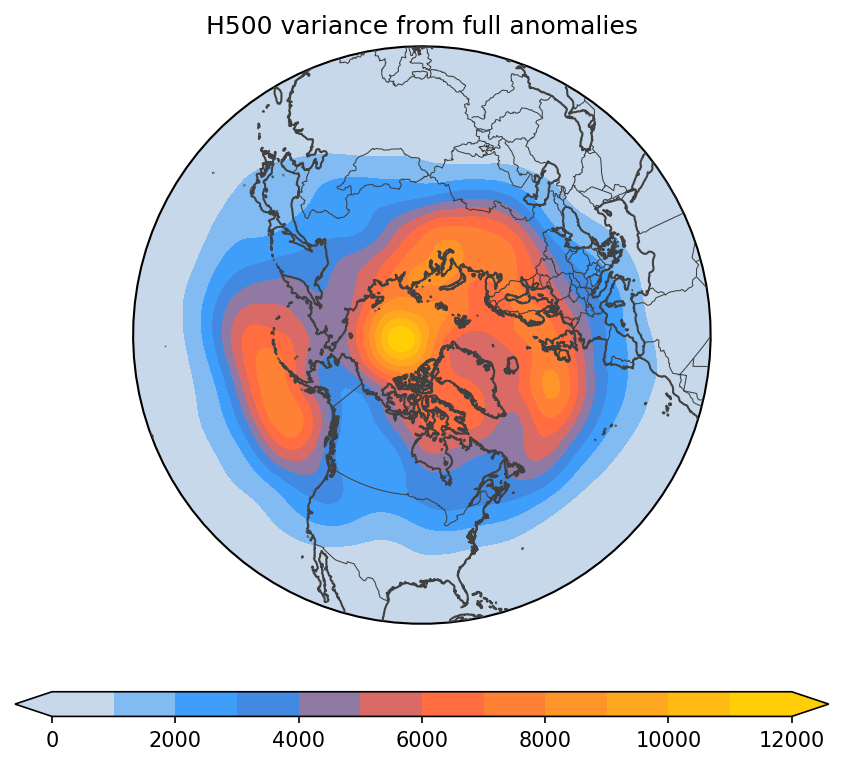

In [6]:
#Variance of full anomalies
varname = 'H500'
prop={'levels':(0,12000),'cmap':{0:'0.9',1:'dodgerblue',2:'tomato',4:'gold'},
      'drawcountries':True,'interpolate':0.5}

obj = copy.deepcopy(LIMdriver.eofobjs[varname].varobjs[0])

datelabel = '-'.join([''.join([f'{int(j):02}' for j in i.split('/')]) for i in datebounds])

variance = np.var(obj.anomaly,axis=0)
ax=LIMdriver.variables[varname].plot_map(variance,prop=prop)
ax.set_title(f'{varname} variance from full anomalies')
#plt.savefig(f'/Users/slillo/soilmoisturestats/{varname}_{datelabel}_fullvar.png',bbox_inches='tight',facecolor='w')


Text(0.5, 1.0, 'H500 variance from EOF-truncated anomalies')

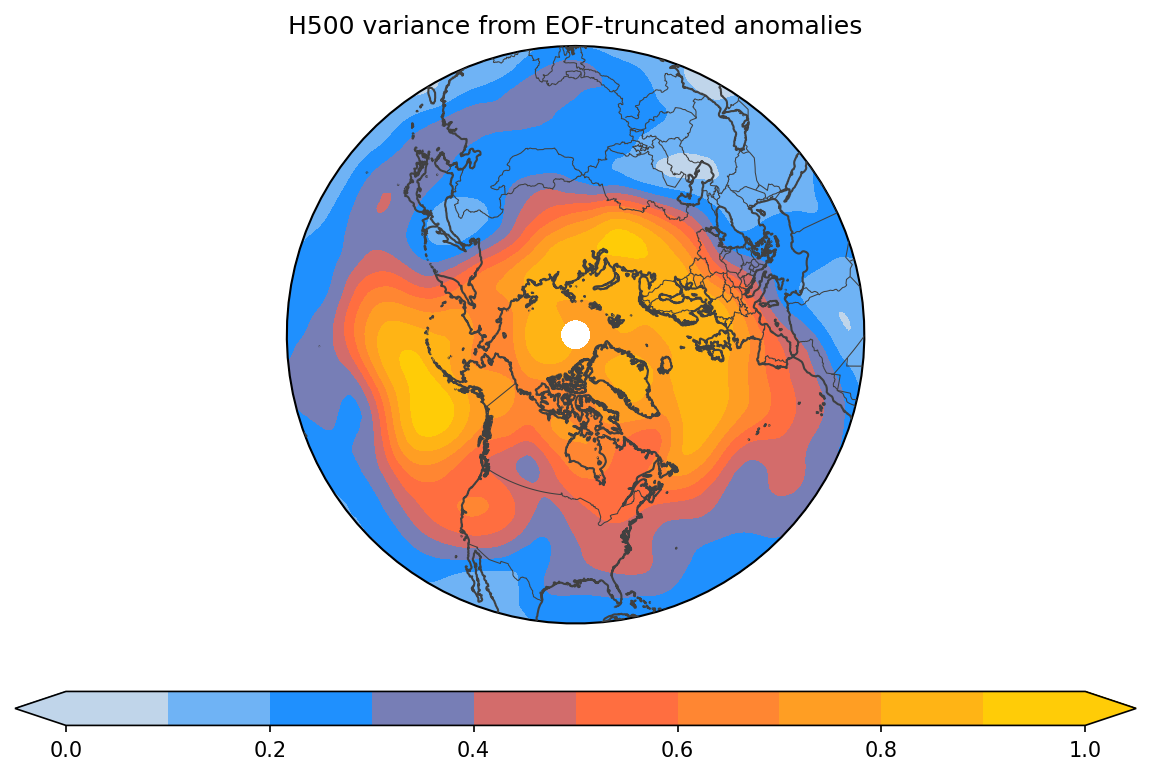

In [16]:
#Variance of EOF-truncated anomalies
variance_trunc = LIMdriver.pc_to_grid(E=LIMdriver.model.C0,varname=varname,regrid=False)**2
prop_ratio={'levels':(0,1),'cmap':{0:'0.9',1:'dodgerblue',2:'tomato',4:'gold'},
      'drawcountries':True,'interpolate':.5}
var_ratio = variance_trunc/variance
var_ratio[var_ratio>1]=1
ax=LIMdriver.variables[varname].plot_map(var_ratio,prop=prop_ratio)
ax.set_title(f'{varname} variance from EOF-truncated anomalies')
#plt.savefig(f'/Users/slillo/soilmoisturestats/{varname}_{datelabel}_truncvar.png',bbox_inches='tight',facecolor='w')


Removing 10 negative eigenvalues and rescaling 84 remaining eigenvalues of Q.
Q eigenvalue rescaling: 0.98


Text(0.5, 1.0, 'H500 variance solving from rescaled Q')

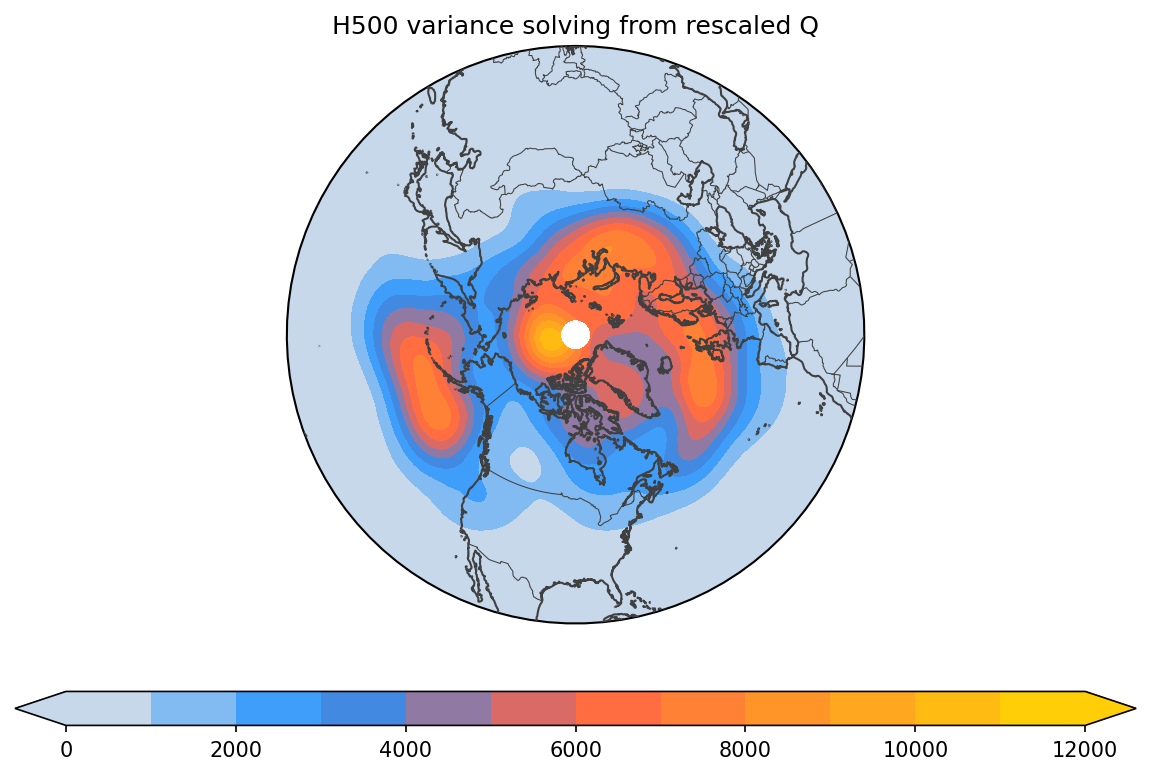

In [18]:
#Variance of EOF-truncated anomalies after solving for C0 from rescaled Q
C0_from_Q = LIMdriver.model.C0_from_Q()
varT2m_Q = LIMdriver.pc_to_grid(E=C0_from_Q,varname=varname)**2
ax=LIMdriver.variables[varname].plot_map(varT2m_Q,prop=prop)
ax.set_title(f'{varname} variance solving from rescaled Q')
#plt.savefig(f'/Users/slillo/var{varname}_Q.png',bbox_inches='tight',facecolor='w')

In [19]:
#Get cross-validated forecats, defaults to 10 folds, for the specified leadtimes. Can save forecasts in netcdf.
LIMdriver.cross_validation(lead_times=(7,14,21,28),\
                           save_netcdf_path=None,segmentby='month')

processing fold #1
Initializing LIM forecasting object...
--> Performing LIM forecast for lead times: (7, 14, 21, 28)
1979-06-01 00:00:00 1982-06-30 00:00:00
processing fold #2
Initializing LIM forecasting object...
--> Performing LIM forecast for lead times: (7, 14, 21, 28)
1983-06-01 00:00:00 1986-06-30 00:00:00
processing fold #3
Initializing LIM forecasting object...
--> Performing LIM forecast for lead times: (7, 14, 21, 28)
1987-06-01 00:00:00 1990-06-30 00:00:00
processing fold #4
Initializing LIM forecasting object...
--> Performing LIM forecast for lead times: (7, 14, 21, 28)
1991-06-01 00:00:00 1994-06-29 00:00:00
processing fold #5
Initializing LIM forecasting object...
--> Performing LIM forecast for lead times: (7, 14, 21, 28)
1994-06-30 00:00:00 1998-06-23 00:00:00
processing fold #6
Initializing LIM forecasting object...
--> Performing LIM forecast for lead times: (7, 14, 21, 28)
1998-06-24 00:00:00 2002-06-17 00:00:00
processing fold #7
Initializing LIM forecasting obje

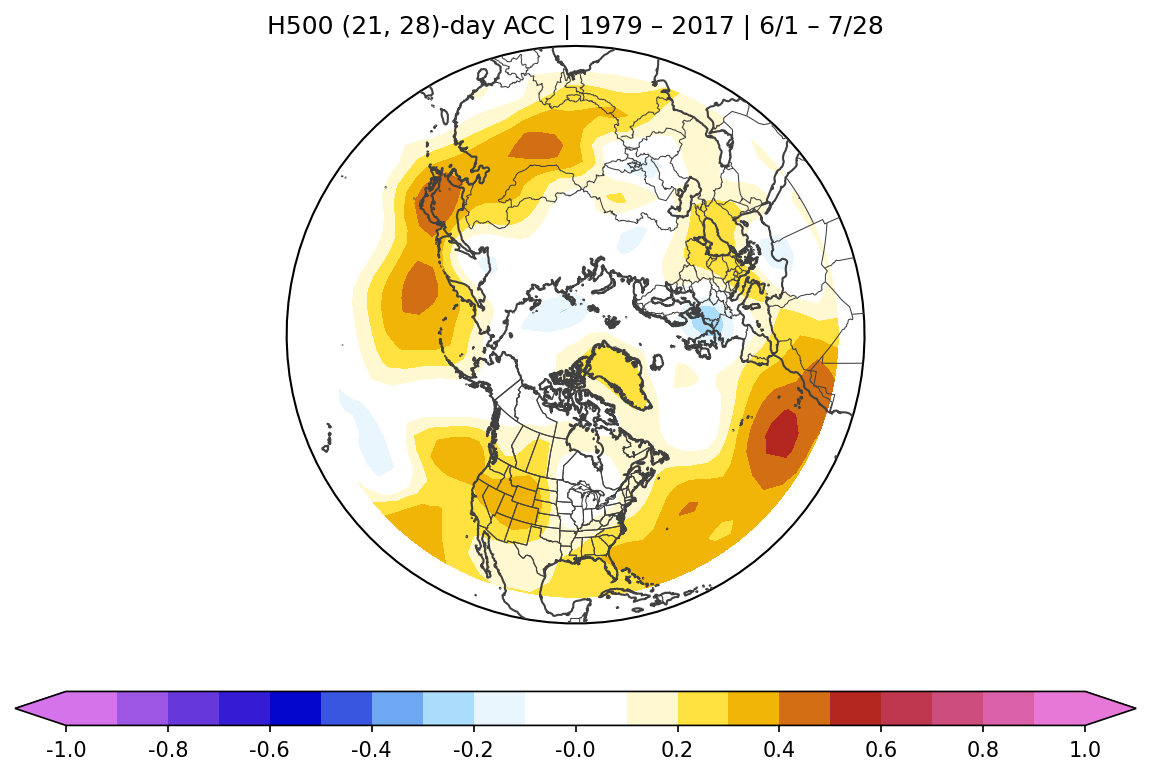

In [20]:
out = LIMdriver.plot_acc(varname='H500',lead_time=(21,28),
                            prop={'levels':(-1,1)},date_range=datebounds,return_array=True)


In [21]:
#Get optimal growth and initial patterns for any norm. None will use the L2 norm
growth,init = LIMdriver.model.optimal_growth(norm=None)

In [22]:
#The initial patterns are in PC space, so let's put it in grid space
out = LIMdriver.pc_to_grid(F=init)

<GeoAxesSubplot:>

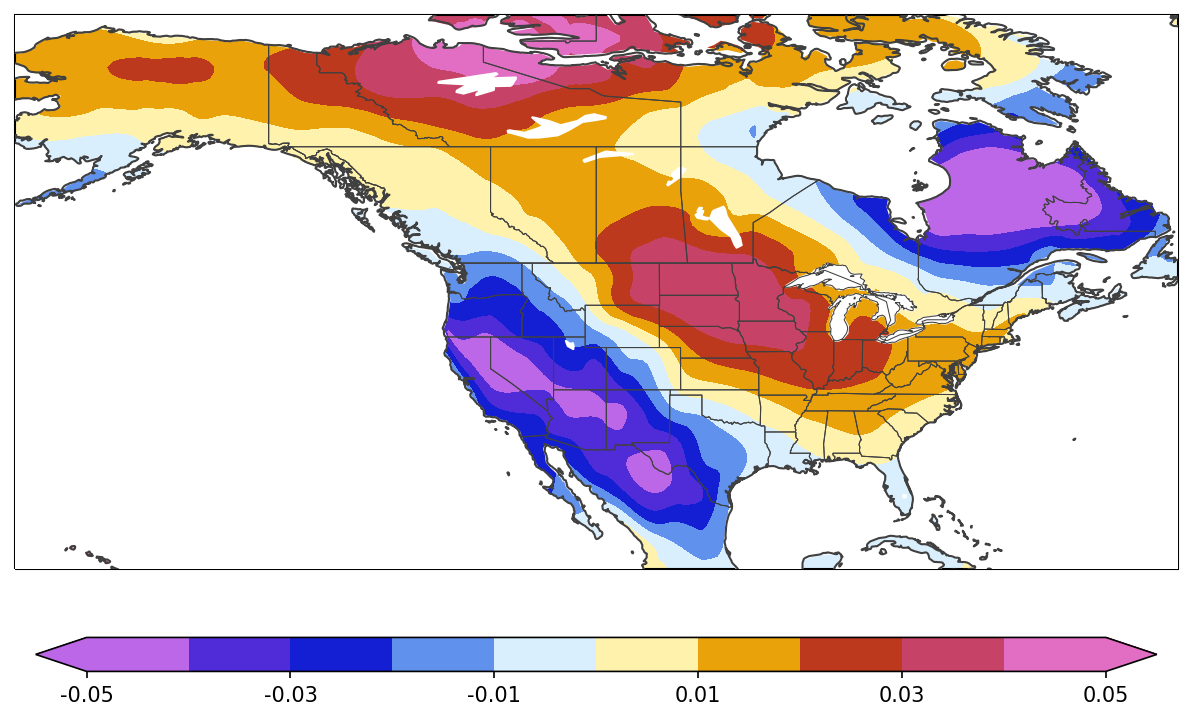

In [27]:
#And plot the variable of our choosing for the first pattern
LIMdriver.variables['T2m'].plot_map(out['T2m'][0],\
                                    prop={'interpolate':.5,'drawcountries':True,'drawstates':True})

In [3]:
#Train LIM and retrieve object with attributes of the model and forecast method
#eof_trunc is a dictionary with keys corresponding with the EOF name and values corresponding to truncations.
#Can loop through different combinations of EOFs and EOF truncations to compare multiple models.
from itertools import product

H100_eofs = np.arange(0,10)
SOIL_eofs = np.arange(0,10)
T2m_eofs = np.arange(3,8)
H500_eofs = np.arange(8,18)
SLP_eofs = np.arange(14,29)
colIrr_eofs = np.arange(14,29)

combos = product(H100_eofs,SOIL_eofs,T2m_eofs,H500_eofs,SLP_eofs,colIrr_eofs)

for e in combos:
    eof_trunc = {'H100':e[0],'SOIL':e[1],'T2m':e[2],'H500':e[3],'SLP':e[4],'colIrr':e[5]}
    LIMdriver.get_model(eof_trunc=eof_trunc, tau1n=5, datebounds=None, yearbounds=None,\
                  load_file=None, save_file=None, save_to_netcdf=None)

In [79]:
pcs = LIMdriver.eofobjs['SOIL'].pc[:,:5]
LIMdriver.eof_trunc = {'SOIL':5}
soil = LIMdriver.pc_to_grid(F=pcs,regrid=False,varname='T2m')

numyrs = len(set([i.year for i in LIMdriver.eofobjs['T2m'].varobjs[0].time]))
peryr = int(len(LIMdriver.eofobjs['T2m'].varobjs[0].time)/numyrs)

from scipy import stats
soilcor = []
for j in range(90):
    s1 = np.concatenate([soil[k*peryr:(k+1)*peryr-j] for k in range(numyrs)],axis=0).T
    s2 = np.concatenate([soil[k*peryr+j:(k+1)*peryr] for k in range(numyrs)],axis=0).T
    soilcor.append([stats.pearsonr(i1,i2)[0] for i1,i2 in zip(s1,s2)])
soilcor = np.array(soilcor)

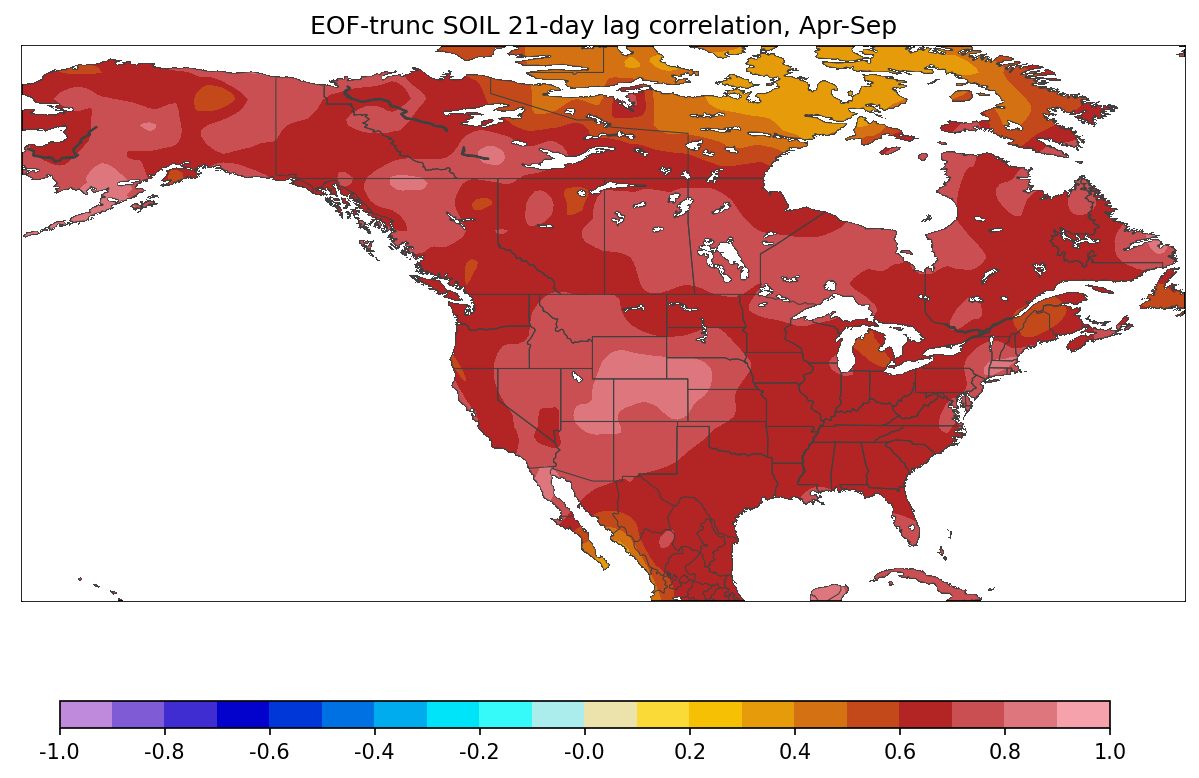

In [78]:
levels = (-1,1)
cmap = {-100:'plum',-65:'mediumblue',-20:'cyan',0:'0.9',20:'gold',65:'firebrick',100:'lightpink'}
ax = LIMdriver.variables['SOIL'].plot_map(soilcor[21],\
                                     prop={'levels':levels,'cmap':cmap,'drawcountries':True,'drawstates':True,'interpolate':.5,'extend':'neither'})
ax.set_title('EOF-trunc SOIL 21-day lag correlation, Apr-Sep')
plt.savefig('/Users/slillo/soil21lag.png',bbox_inches='tight',facecolor='w')

In [396]:
import numpy as np
from scipy.linalg import eig,inv
import dill as pickle

with open('/Users/slillo/lim.p', 'rb') as f:
    model = pickle.load(f)

#First find the eigenmodes and sort them by e-folding time:
eValLR,eVecL,eVecR=eig(model.L,left=True,right=True)

# Find normalization such that eVecL'*eVecR=I
norm=inv(eVecL.T@eVecR)

# Normalize right eigenvector
eVecR=eVecR@norm
   
# Check that eq. (26) from Penland MWR 1989 is satisfied (both check and check should  equal the identity matrix)
check=np.diag(eVecL.T@eVecR)
check2=np.diag(eVecL@eVecR.T)
   
# Sort eigenmodes by size of e-folding time
sort_idx = np.real(eValLR).argsort()[::-1]
eVecR = eVecR[:,sort_idx]
eVecL = eVecL[:,sort_idx]
eValLR = eValLR[sort_idx]

# Calculate e-folding time of eigenmodes and their periods (and frequencies)
efold=1/(-np.real(eValLR))
freq=np.imag(eValLR)/(2*np.pi)
period=1/freq  

# Plot the magnitude of projection that each eigenmode has on each variable in the state vector
out = LIMdriver.pc_to_grid(F=eVecR.T)

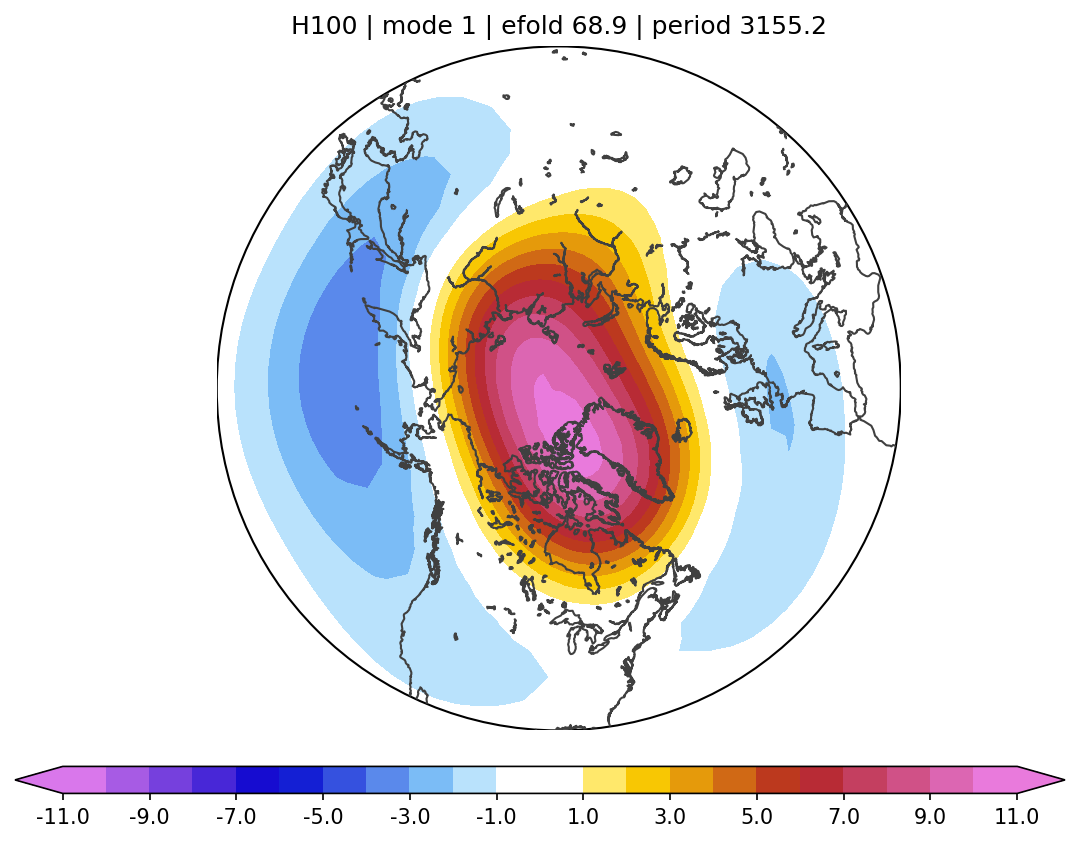

In [401]:
import matplotlib.gridspec as gridspec

emode = 1

varname = 'H100'
ax = LIMdriver.variables[varname].plot_map(out[varname][emode])
ax.set_title(f'{varname} | mode {emode} | efold {efold[emode]:0.1f} | period {period[emode]:0.1f}')

plt.show()
plt.close()

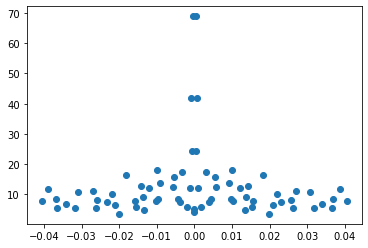

In [270]:
plt.scatter(freq,efold)

In [394]:
import pandas as pd

WEEK = 4
t2m_fcst = {t:LIMdriver.pc_to_grid(F=F[WEEK-1],varname='T2m') for t,F in LIMdriver.model_F.items()}

t2m_df = pd.DataFrame.from_dict({'year':[t.year for t in t2m_fcst.keys()],'grid':list(t2m_fcst.values())})
t2m_byyr = t2m_df.groupby('year')
t2m_byyr = {g[0]:np.mean(g[1]['grid']) for g in t2m_byyr}

def get_slope(Y):
    X = np.arange(len(Y))
    return np.polyfit(X,Y,1)[0]

t2m_fcst_trend = list(map(get_slope,np.array(list(t2m_byyr.values())).T))

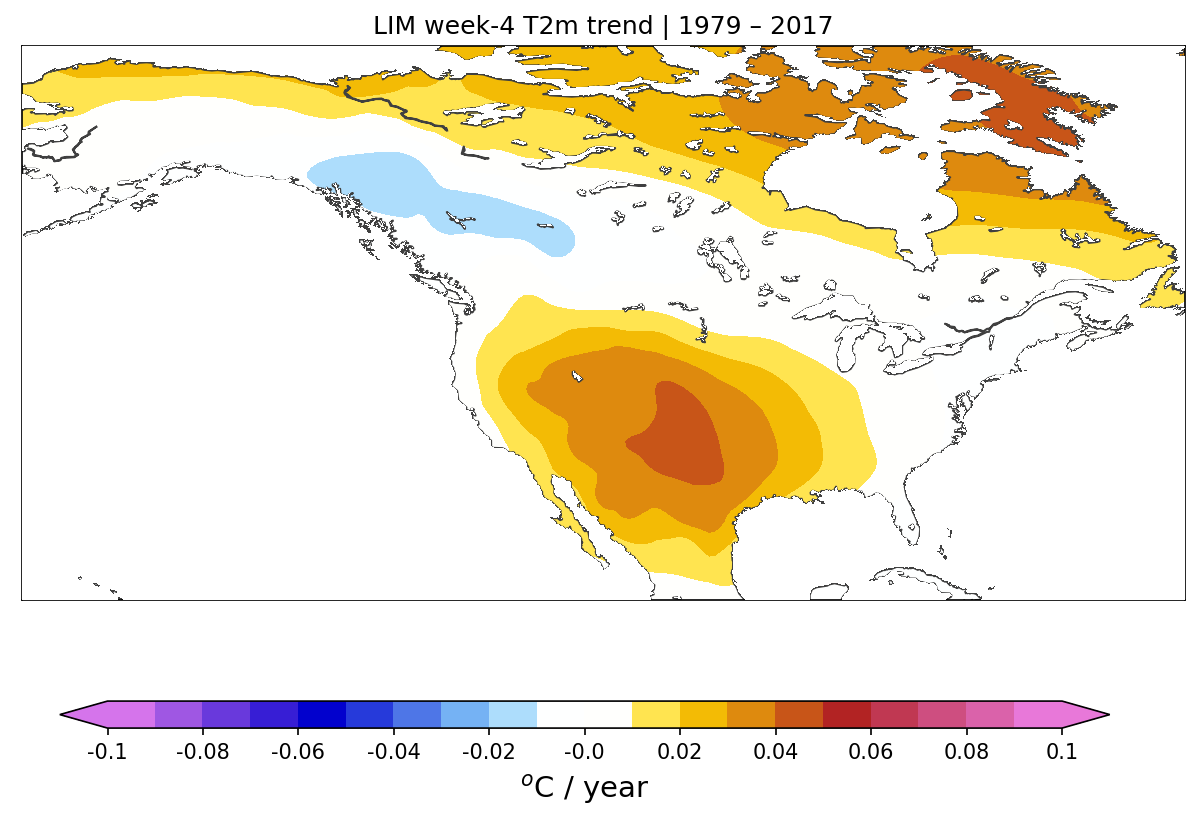

In [395]:
prop = {'interpolate':0.5,'cbar_label':'$^o$C / year','levels':(-.1,.1)}
ax = LIMdriver.variables['T2m'].plot_map(np.array(t2m_fcst_trend),prop=prop)
ax.set_title(f'LIM week-{WEEK} T2m trend | 1979 – 2017')
plt.savefig(f'/Users/slillo/T2m_trend_LIM{WEEK}.png',bbox_inches='tight',facecolor='w')

In [372]:
import pandas as pd
#t2m_fcst = {t:LIMdriver.pc_to_grid(F=F,varname='T2m') for t,F in LIMdriver.model_F.items()}
varobj = LIMdriver.variables['T2m'].subset(datebounds=('1/1','3/31'))
t2m_anl = {t:F for t,F in zip(varobj.time,varobj.anomaly)}

t2m_df = pd.DataFrame.from_dict({'year':[t.year for t in t2m_anl.keys()],'grid':list(t2m_anl.values())})
t2m_byyr = t2m_df.groupby('year')
t2m_byyr = {g[0]:np.mean(g[1]['grid']) for g in t2m_byyr}

def get_slope(Y):
    X = np.arange(len(Y))
    return np.polyfit(X,Y,1)[0]

t2m_anl_trend = list(map(get_slope,np.array(list(t2m_byyr.values())).T))

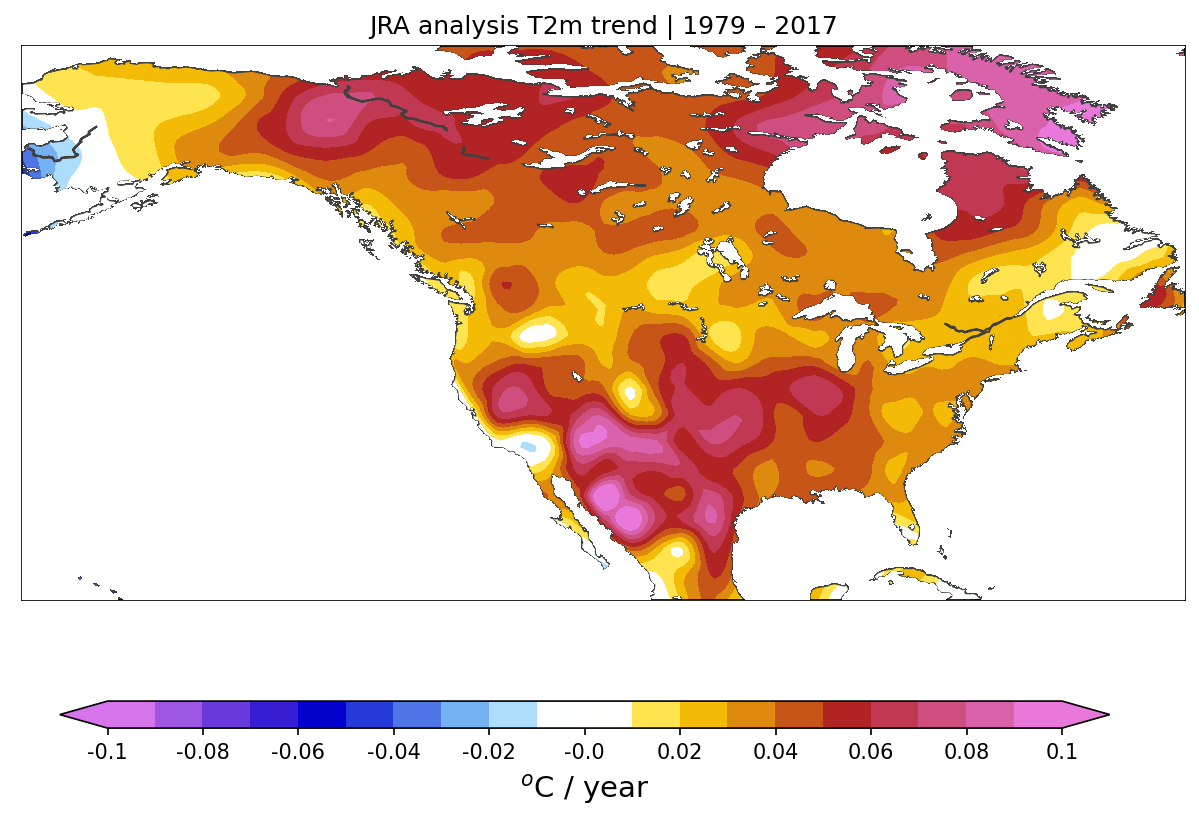

In [379]:
ax = LIMdriver.variables['T2m'].plot_map(np.array(t2m_anl_trend),prop=prop)
ax.set_title('JRA analysis T2m trend | 1979 – 2017')
plt.savefig('/Users/slillo/T2m_trend_JRAanl.png',bbox_inches='tight',facecolor='w')

In [370]:
import pandas as pd
eofobj = LIMdriver.eofobjs['T2m']
varobj = eofobj.varobjs[0]
t2m_0 = {t:eofobj.reconstruct(F)['T2m'].squeeze() for t,F in zip(varobj.time,eofobj.pc[:,:5])}

t2m_df = pd.DataFrame.from_dict({'year':[t.year for t in t2m_0.keys()],'grid':list(t2m_0.values())})
t2m_byyr = t2m_df.groupby('year')
t2m_byyr = {g[0]:np.mean(g[1]['grid']) for g in t2m_byyr}

def get_slope(Y):
    X = np.arange(len(Y))
    return np.polyfit(X,Y,1)[0]

t2m_0_trend = list(map(get_slope,np.array(list(t2m_byyr.values())).T))

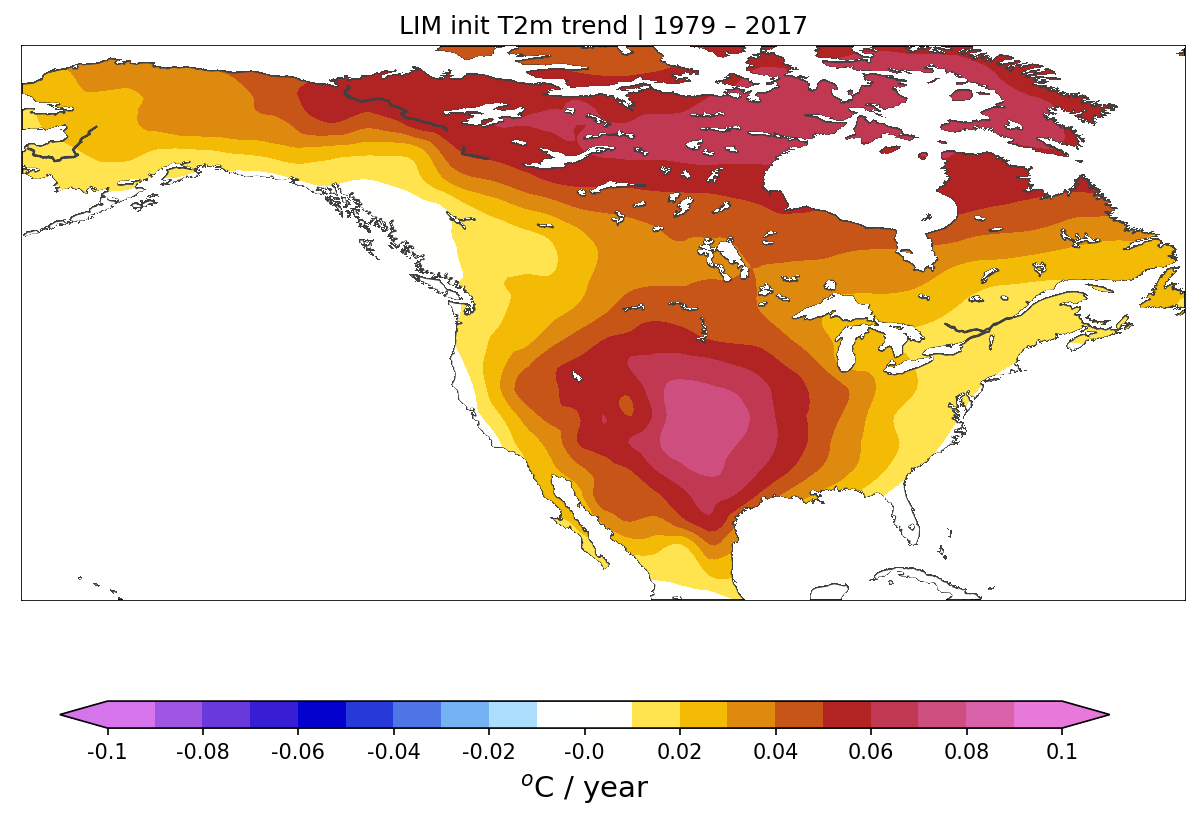

In [380]:
ax = LIMdriver.variables['T2m'].plot_map(np.array(t2m_0_trend),prop=prop)
ax.set_title('LIM init T2m trend | 1979 – 2017')
plt.savefig('/Users/slillo/T2m_trend_LIMinit.png',bbox_inches='tight',facecolor='w')